# Method descriptions

* **centralized** finds global classifier using the centralized data
* Average local classifiers between neighbors
  * **avg-unweighted** all the edges have the same value
  * **avg-weighted** algorithm weights an edge as the *similarity* between the two nodes *times* the *number of instances* of the neighbor (normalized)
* **regularised** learns local classifiers keeping them similar to the neighbors' classifiers
* **local** learns independent local classifiers


In [37]:
# imports
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import sys
sys.path.append('../src/')

from classification import get_scipy_selected_stumps
from optimization import local_FW
from network import synthetic_graph
from utils import generate_models, generate_moons

import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
D = 80
NOISE_R = 0.05
random_state = 2018

V, theta_true, cluster_indexes = generate_models(nb_clust=1, nodes_per_clust=2, random_state=random_state)
_, X, Y, X_test, Y_test, _, _ = generate_moons(V, theta_true, D, random_state=random_state, sample_error_rate=NOISE_R)

nodes, _, _ = synthetic_graph(X, Y, X_test, Y_test, V, theta_true)

In [39]:
base_clfs, ada_clfs = get_scipy_selected_stumps(x=X, y=Y, d=D)

r = local_FW(nodes, base_clfs, nb_iter=1000, beta=1*D, simplex=False, callbacks={}) 

### Visualize classification


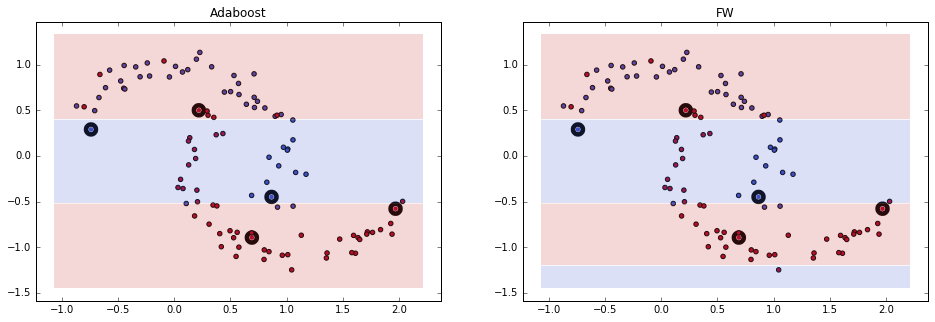

In [40]:
NODE = 1
plt.figure(1, figsize=(16, 5))

# construct grid
x_min, x_max = X_test[NODE][:,0].min() - 0.2, X_test[NODE][:,0].max() + 0.2
y_min, y_max = X_test[NODE][:,1].min() - 0.2, X_test[NODE][:,1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# FW optimization
plt.subplot(121)
plt.title("Adaboost")
grid_set = np.c_[xx.ravel(), yy.ravel()]
grid_set = np.hstack((grid_set, np.zeros((len(grid_set), D - 1))))
y = ada_clfs[NODE].predict(grid_set).reshape(xx.shape)

plt.scatter(X[NODE][:,0], X[NODE][:,1], c=Y[NODE], cmap=plt.cm.coolwarm, linewidths=10)
plt.scatter(X_test[NODE][:,0], X_test[NODE][:,1], c=Y_test[NODE], cmap=plt.cm.coolwarm)

plt.contourf(xx, yy, y, cmap=plt.cm.coolwarm, alpha=0.2)

# standard adaboost
plt.subplot(122)
plt.title("FW")
grid_set = np.c_[xx.ravel(), yy.ravel()]
grid_set = np.hstack((grid_set, np.zeros((len(grid_set), D - 1))))
y = nodes[NODE].predict(grid_set).reshape(xx.shape)

plt.scatter(X[NODE][:,0], X[NODE][:,1], c=Y[NODE], cmap=plt.cm.coolwarm, linewidths=10)
plt.scatter(X_test[NODE][:,0], X_test[NODE][:,1], c=Y_test[NODE], cmap=plt.cm.coolwarm)

plt.contourf(xx, yy, y, cmap=plt.cm.coolwarm, alpha=0.2)

In [41]:
print(nodes[NODE].alpha)
print(ada_clfs[NODE].estimator_weights_)

[[ -3.19680320e-04]
 [  0.00000000e+00]
 [ -2.65070929e+01]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  2.68987013e+01]
 [  2.65919680e+01]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
